# Import packages

In [1]:
%pip install plotly seaborn nltk scikit-learn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Upload the data into a DataFrame

Note : les donnees utilisees datent du 18.01.2024

In [3]:
DATA_RAW_PATH = Path('../data/raw/')
DATA_RAW_PATH.mkdir(parents=True, exist_ok=True)

with open(DATA_RAW_PATH / Path("rdg_corpus.json"), 'r') as f:
  content = json.load(f)

df = pd.DataFrame(content)

# Explorations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66379 entries, 0 to 66378
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     66379 non-null  object 
 1   type                     66379 non-null  object 
 2   url                      66379 non-null  object 
 3   identifier               947 non-null    object 
 4   description              38326 non-null  object 
 5   published_at             66379 non-null  object 
 6   global_id                4450 non-null   object 
 7   publisher                4450 non-null   object 
 8   citationHtml             4450 non-null   object 
 9   identifier_of_dataverse  4450 non-null   object 
 10  name_of_dataverse        4450 non-null   object 
 11  citation                 4450 non-null   object 
 12  storageIdentifier        4450 non-null   object 
 13  keywords                 3225 non-null   object 
 14  subjects              

In [5]:
df['type'].value_counts()

type
file         60982
dataset       4450
dataverse      947
Name: count, dtype: int64

In [6]:
# display the first 5 rows of each type of file
df_file = df[df['type'] == 'file']
df_file = df_file.dropna(axis=1, how='all')
df_file.columns

Index(['name', 'type', 'url', 'description', 'published_at', 'file_id',
       'file_type', 'file_content_type', 'size_in_bytes', 'md5', 'checksum',
       'unf', 'file_persistent_id', 'dataset_name', 'dataset_id',
       'dataset_persistent_id', 'dataset_citation'],
      dtype='object')

In [7]:
df_dataset = df[df['type'] == 'dataset']
df_dataset = df_dataset.dropna(axis=1, how='all')
df_dataset.columns

Index(['name', 'type', 'url', 'description', 'published_at', 'global_id',
       'publisher', 'citationHtml', 'identifier_of_dataverse',
       'name_of_dataverse', 'citation', 'storageIdentifier', 'keywords',
       'subjects', 'fileCount', 'versionId', 'versionState', 'majorVersion',
       'minorVersion', 'createdAt', 'updatedAt', 'contacts', 'authors',
       'publications', 'geographicCoverage', 'producers', 'dataSources',
       'relatedMaterial'],
      dtype='object')

In [8]:
df_dataverse = df[df['type'] == 'dataverse']
df_dataverse = df_dataverse.dropna(axis=1, how='all')
df_dataverse.columns

Index(['name', 'type', 'url', 'identifier', 'description', 'published_at'], dtype='object')

In [9]:
# check the content of a particular column (e.g. 'type')
df['dataset_persistent_id'].value_counts()

dataset_persistent_id
doi:10.57745/CM2WOI    3502
doi:10.57745/QN7MMM    2949
doi:10.57745/WW7TY7    2889
doi:10.57745/02XLWL    2140
doi:10.15454/UIJTJA    2114
                       ... 
doi:10.57745/2YPE0F       1
doi:10.57745/ISPFKW       1
doi:10.57745/Q2CPKZ       1
doi:10.57745/O34BW3       1
doi:10.15454/KMNR6R       1
Name: count, Length: 2854, dtype: int64

In [10]:
# check columns is always set for a particular type of file : i.e 'dataset_id' in files
df_file['dataset_persistent_id'].isnull().sum()

0

**Colonnes dans tous les types de fichiers** : 
- 'name' : Le nom du fichier,
- 'type' : Le type de fichier (file, dataset, dataverse),
- 'url' : L'url du fichier,
- 'description' : La description du fichier,
- 'published_at': La date de publication du fichier,

 **Uniquement dans les "files" :** 
 - 'file_id' : Identifiant technique du fichier,
 - 'file_type' : Type de fichier (txt, jpeg, tiff, etc...),
 - 'file_content_type' : Type de fichier au format MIME (text/plain, image/jpeg, image/tiff, etc...),
 - 'size_in_bytes' : Taille du fichier en octets,
 - 'md5' : Hash md5 du fichier (pour verifier l'integrite du fichier),
 - 'checksum' : Hash sha1 du fichier (pour verifier l'integrite du fichier),
 - 'unf' : Universal Numeric Fingerprint (pour verifier l'integrite du fichier),
 - 'file_persistent_id' : Identifiant unique du fichier (DOI),
 - 'dataset_name' : Nom du dataset auquel appartient le fichier,
 - 'dataset_id' : Identifiant technique du dataset auquel appartient le fichier,
 - 'dataset_persistent_id' : Identifiant unique du dataset auquel appartient le fichier (DOI),
 - 'dataset_citation' : Citation du dataset auquel appartient le fichier,

**Uniquement dans les "datasets" :** 
- 'global_id' : Identifiant DOI du dataset,
- 'publisher' : Editeur du dataset (ex: Data INRAE),
- 'citationHtml' : Citation du dataset au format HTML,
- 'identifier_of_dataverse' : Identifiant technique du dataverse,
- 'name_of_dataverse' : Nom du dataverse,
- 'citation' : Citation du dataset,
- 'dataSources' : Sources de donnees (documentation ou lien externe),
- 'relatedMaterial' : Contentus supplementaires,
- 'storageIdentifier' :  Identificant de stockage du portail (ex: inrae://10.15454/UGMTBK),
- 'subjects' : Thematiques du dataset,
- 'fileCount' : Nombre de fichiers associes au dataset,
- 'versionId' : Identifiant technique de la version du dataset,
- 'versionState' : Etat de la version du dataset (Nous avons uniquement accès aux 'RELEASED'),
- 'majorVersion' : Numéro de version majeure,
- 'minorVersion' : Numéro de version mineure,
- 'publications' : Publications associées au dataset,
- 'keywords' : Mots-clés du dataset,
- 'geographicCoverage' : Couverture géographique du dataset,
- 'createdAt' : Date de création du dataset,
- 'updatedAt' : Date de mise à jour du dataset,
- 'contacts' : Contacts pour le dataset,
- 'authors' : Auteurs du dataset,
- 'producers' : Producteurs du dataset (ex: data.sciencespo, DataSuds, INRAE, etc...),

**Uniquement dans les "dataverse" :** 
- 'identifier' : Identifiant technique du dataverse,

# Description analysis

In [11]:
df_description = df[df['description'].notna()]

In [12]:
df_description['type'].value_counts()

type
file         33166
dataset       4450
dataverse      710
Name: count, dtype: int64

**All the datasets have a description**

In [13]:
df_description['descr_len'] = df_description['description'].str.len()

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\3048656202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_description['descr_len'] = df_description['description'].str.len()


In [14]:
df_description['descr_len'].value_counts()

descr_len
0       22981
18        239
7         228
67        206
240       171
        ...  
1939        1
1549        1
2625        1
831         1
2723        1
Name: count, Length: 1884, dtype: int64

In [15]:
df_description_1 = df_description[df_description['descr_len'] != 0]

In [16]:
df_description_1['type'].value_counts()

type
file         10185
dataset       4450
dataverse      710
Name: count, dtype: int64

In [17]:
df_description_1['descr_len'].value_counts()

descr_len
18      239
7       228
67      206
240     171
46      167
       ... 
1939      1
1549      1
2625      1
831       1
2723      1
Name: count, Length: 1883, dtype: int64

In [18]:
df_description_1['descr_len'].describe()

count    15345.000000
mean       334.087911
std        700.623262
min          3.000000
25%         46.000000
50%         96.000000
75%        284.000000
max      13383.000000
Name: descr_len, dtype: float64

In [19]:
max_x = int(df_description_1['descr_len'].max())

# Create the histogram
fig = px.histogram(df_description_1, x='descr_len', nbins=int(max_x/1.5), color='type')

# Zoom to description lengths below 500 characters
fig.update_xaxes(range=[0, 1000])

# Calculate the median description length for each type
medians = df_description_1.groupby('type')['descr_len'].median()

# Add a vertical line for each type's median
for file_type, median in medians.items():
    fig.add_vline(x=median, line_dash='dash', line_color='black', annotation_text=f"Median {file_type}", 
                  annotation_position="top left")

# Show the figure
fig.show()

In [20]:
df_description_1['description']

0        Collection dédiée aux données issues d’analyse...
1        Vocabulaires Ouverts @ INRAE référence les res...
2        URGI - Unité de Recherche Génomique Info is a ...
3                   Genetic and genomic information system
5        This dataverse contains data produced in the f...
                               ...                        
66374    In Africa, the decline of numerous tree specie...
66375    Quantitative data collected during a contest g...
66376    Tuta absoluta (Meyrick) (Lepidoptera, Gelechii...
66377    L’enquête “Capital social, Réseaux sociaux et ...
66378    Cet ensemble de données comprend les transcrip...
Name: description, Length: 15345, dtype: object

In [21]:
# Check % of missing descriptions per type
dataverse_desc = 1 - df_dataverse['description'].isnull().sum() / len(df_dataverse)
file_desc = 1 - df_file['description'].isnull().sum() / len(df_file)
dataset_desc = 1 - df_dataset['description'].isnull().sum() / len(df_dataset)

print(
    f"Description pour chacun des types de fichiers :\nDataverse : {dataverse_desc:.2%}\nFile : {file_desc:.2%}\nDataset : {dataset_desc:.2%}"
)

Description pour chacun des types de fichiers :
Dataverse : 74.97%
File : 54.39%
Dataset : 100.00%


In [22]:
from nltk.corpus import stopwords
from nltk.tokenize  import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anthony\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anthony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Tokenize and count words in each description
df_description_1["word_count"] = df_description_1['description'].apply(lambda x: len(word_tokenize(x)))

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\3091102671.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
df_description_1['word_count'].describe()

count    15345.000000
mean        58.735940
std        126.226685
min          1.000000
25%          7.000000
50%         16.000000
75%         50.000000
max       2639.000000
Name: word_count, dtype: float64

In [25]:
# do the same thing for word count
max_x = int(df_description_1['word_count'].max())

# Create the histogram
fig = px.histogram(df_description_1, x='word_count', nbins=int(max_x), color='type')

# Zoom to description lengths below 500 characters
fig.update_xaxes(range=[0, 300])

# Calculate the median description length for each type
medians = df_description_1.groupby('type')['word_count'].median()

# Add a vertical line for each type's median
for file_type, median in medians.items():
    fig.add_vline(x=median, line_dash='dash', line_color='black', annotation_text=f"Median {file_type}", 
                  annotation_position="top left")
    
# Show the figure
fig.show()

In [26]:
# only keep row with fileCount == 0 in df_datasets
df_dataset = df_dataset[df_dataset['fileCount'] == 0]

df_dataset.head()
# number of row

,name,type,url,description,published_at,global_id,publisher,citationHtml,identifier_of_dataverse,name_of_dataverse,...,minorVersion,createdAt,updatedAt,contacts,authors,publications,geographicCoverage,producers,dataSources,relatedMaterial
892,Encyclop'aphid,dataset,https://doi.org/10.15454/1.4333379890530916E12,Abstract:Encyclop'aphid is an Encyclopedia on ...,2018-08-17T10:08:06Z,doi:10.15454/1.4333379890530916E12,Data INRAE,"Hull&eacute;, Maurice; Turpeau, Evelyne; Chaub...",inrae,Data INRAE,...,0.0,2018-01-25T15:31:01Z,2018-08-17T10:08:06Z,"[{'name': 'admin', 'affiliation': 'www.inra.fr'}]","[Hullé, Maurice, Turpeau, Evelyne, Chaubet, Be...",NaN,NaN,NaN,NaN,NaN
894,Winter wheat (Triticum aestivum L) phenotypic ...,dataset,https://doi.org/10.15454/1.4489666216568333E12,Abstract:Winter wheat phenotypic data from a F...,2018-08-20T16:31:02Z,doi:10.15454/1.4489666216568333E12,URGI - Plant Bioinformatics Facility,Fran&ccedil;ois-Xavier Oury; Emmanuel Heumez; ...,urgi,URGI - Plant Bioinformatics Facility,...,3.0,2018-01-25T15:31:19Z,2023-09-06T08:38:01Z,"[{'name': 'Oury, François-Xavier', 'affiliatio...","[François-Xavier Oury, Emmanuel Heumez, Bernar...",[{}],[{'country': ''}],NaN,NaN,NaN
895,Multi-scale Multi-step ontology,dataset,https://doi.org/10.15454/1.4502762931471938E12,The Multi-scale Multi-step ontology (MS²O) is ...,2018-08-20T16:31:06Z,doi:10.15454/1.4502762931471938E12,Vocabulaires Ouverts,"Dervaux, St&eacute;phane; Dibie, Juliette, 201...",vo-inrae,Vocabulaires Ouverts,...,5.0,2018-01-25T15:31:22Z,2022-08-09T14:47:47Z,"[{'name': 'Dervaux, Stéphane', 'affiliation': ...","[Dervaux, Stéphane, Dibie, Juliette]",[{}],[{'country': ''}],NaN,NaN,NaN
896,Blumeria graminis hordei genome: Transposable ...,dataset,https://doi.org/10.15454/1.44543859671938E12,Abstract:Transposable element (TE) annotation ...,2018-08-20T16:30:57Z,doi:10.15454/1.44543859671938E12,Data INRAE,"Amselem, Joelle, 2018, ""Blumeria graminis hord...",inrae,Data INRAE,...,0.0,2018-01-25T15:31:15Z,2018-08-20T16:30:57Z,"[{'name': 'admin', 'affiliation': 'www.inra.fr'}]","[Amselem, Joelle]",NaN,[{'other': 'geoLocationPlace:INRA - URGI Versa...,NaN,NaN,NaN
897,Data and metadata dealing with prokaryote and ...,dataset,https://doi.org/10.15454/1.4539792655245962E12,Abstract:Data from 210 articles and five unpub...,2018-08-20T16:31:10Z,doi:10.15454/1.4539792655245962E12,Data INRAE,"Jacquet, St&eacute;phan; Parikka, Kaarle Joona...",inrae,Data INRAE,...,0.0,2018-01-25T15:31:25Z,2018-08-20T16:31:10Z,"[{'name': 'admin', 'affiliation': 'www.inra.fr'}]","[Jacquet, Stéphan, Parikka, Kaarle Joonas]",NaN,NaN,NaN,NaN,NaN


# Auteurs / Publishers / Producers

In [27]:
# value_count of authors
authors_appearance = {}

# remove rows with empty authors
df_authors = df.dropna(subset=['authors'])

# iter over the dataframe df on authors
for authors in df_authors['authors']:
    if authors:
        # iter over the authors
        for author in authors:
            # if the author is not in the dict authors_appearance
            if author not in authors_appearance:
                # add the author to the dict authors_appearance
                authors_appearance[author] = 1
            else:
                # else increment the author's value in the dict authors_appearance
                authors_appearance[author] += 1

# sort dict by value
authors_appearance = dict(sorted(authors_appearance.items(), key=lambda item: item[1], reverse=True))
authors_appearance

{'Richard, Hervé': 319,
 'Lardot, Benjamin': 240,
 'Cantelaube, Pierre': 239,
 'Sciences Po, Centre de données socio-politiques (CDSP), CNRS': 100,
 "Ministère de l'Intérieur": 75,
 "Sciences Po Grenoble, Centre d'informatisation des données socio-politiques (CIDSP), CNRS": 71,
 'Danchin, Etienne': 51,
 'Sauquet, Éric': 41,
 'Buche, Patrice': 34,
 'Vidal, Jean-Philippe': 32,
 'Sciences Po, Observatoire interrégional du politique (OIP)': 31,
 'Knorr, Michael': 31,
 'Héraut, Louis': 29,
 'Pagès, Jean-Pierre': 28,
 'Agrafiotis, Démosthène': 28,
 'Évin, Guillaume': 26,
 'Deborde, Catherine': 24,
 'Tiberj, Vincent': 24,
 'Gougou, Florent': 23,
 'Strohmann, Carsten': 23,
 'Chabannes, Matthieu': 22,
 'Sauger, Nicolas': 20,
 'Candresse, Thierry': 19,
 'Chave, Jérôme': 19,
 'Rimet, Frédéric': 18,
 'Vacher, Corinne': 18,
 'Moing, Annick': 18,
 'Gourlet-Fleury, Sylvie': 18,
 'Derroire, Géraldine': 18,
 'Saby, Nicolas': 17,
 'Roche, Mathieu': 17,
 'Bouchez, Agnès': 16,
 'Lange, Frédéric': 16,
 'Fa

In [28]:
# Same thing but for publisher
publishers_appearance = {}

# remove rows with empty publishers
df_publishers = df.dropna(subset=['publisher'])

# iter over the dataframe df on publishers
for publisher in df_publishers['publisher']:
    if publisher:
        # if the publisher is not in the dict publishers_appearance
        if publisher not in publishers_appearance:
            # add the publisher to the dict publishers_appearance
            publishers_appearance[publisher] = 1
        else:
            # else increment the publisher's value in the dict publishers_appearance
            publishers_appearance[publisher] += 1
                                  
# sort dict by value
publishers_appearance = dict(sorted(publishers_appearance.items(), key=lambda item: item[1], reverse=True))
publishers_appearance

{'Data INRAE': 639,
 'Institut d’études politiques de Paris': 443,
 'Data Université de Franche-Comté': 440,
 'Centre de Coopération Internationale en Recherche Agronomique pour le Développement': 232,
 'Institut de recherche pour le développement': 211,
 'Experimental - Observation - Simulation Dataverse': 210,
 'Omics Dataverse': 113,
 'RPG complété 2019': 94,
 'RPG complété 2018': 94,
 'Vocabulaires Ouverts': 58,
 'Espace Générique': 57,
 'Explore2': 53,
 'DOREL (Université de Lorraine)': 50,
 'URGI - Plant Bioinformatics Facility': 44,
 'atweb Dataverse': 42,
 'Biogeco Dataverse': 40,
 'Surveys & Texts Dataverse': 29,
 'Data Université de Bourgogne': 29,
 'CNRS Research Data': 26,
 'GisSol Dataverse': 25,
 'UMR IGEPP': 24,
 'Data Univ. Gustave Eiffel': 24,
 'UMR ECOBIOP 1224 INRAE/UPPA Dataverse': 23,
 'RIVERLY': 22,
 'Meloidogyne-Telomeres': 21,
 'TETIS': 20,
 'Umr-decod': 20,
 'Université Paris-Saclay': 19,
 'AMAP ECOPICS': 19,
 'Data Repository Grenoble Alpes': 19,
 'RPG complét

In [29]:
# Same thing but for producers
producers_appearance = {}

# remove rows with empty producers
df_producers = df.dropna(subset=['producers'])

# iter over the dataframe df on producers
for producers in df_producers['producers']:

    if producers:
        for producer in producers:
            # if the producer is not in the dict producers_appearance
            if producer not in producers_appearance:
                # add the producer to the dict producers_appearance
                producers_appearance[producer] = 1
            else:
                # else increment the producer's value in the dict producers_appearance
                producers_appearance[producer] += 1

# sort dict by value
producers_appearance = dict(sorted(producers_appearance.items(), key=lambda item: item[1], reverse=True))
producers_appearance

{'data.sciencespo': 443,
 'Laboratoire Chrono-environnement (UMR 6249)': 344,
 'CIRAD Dataverse': 232,
 'DataSuds': 211,
 'INRAE': 92,
 'Université de Lorraine': 77,
 'Centre National de la Recherche Scientifique': 60,
 'Explore2': 53,
 'Centre national de la recherche scientifique': 38,
 'Université Gustave Eiffel': 37,
 "Institut national de recherche pour l'agriculture, l'alimentation et l'environnement": 28,
 'Université de Lille': 24,
 'AgroParisTech': 23,
 'Université de Strasbourg': 23,
 'Université Paris-Saclay': 19,
 'International Union of Crystallography': 17,
 'dataUBFC - Atelier de la donnée de Bourgogne-Franche-Comté': 16,
 'Unité Mixte de Recherche Fractionnement des AgroRessources et Environnement': 14,
 'Institut UTINAM (UMR 6213)': 14,
 'Université de Bordeaux': 13,
 'Bordeaux INP': 12,
 'CNES': 11,
 'Institut Pasteur': 10,
 'UMR0782 SayFood': 10,
 'Laboratoire Interdisciplinaire Carnot de Bourgogne (UMR 6303)': 10,
 'Conservatoire National des Arts et Métiers': 9,
 '

# Keywords analysis

In [30]:
# keep only datasets
datasets = df[df['type'] == 'dataset']
# replace NaN with empty string
datasets['keywords'] = datasets['keywords'].fillna('')
df_keywords = datasets

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\3903145149.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
df_keywords["keywords"]

892                                            [Aphididae]
894        [Winter wheat, Phenotype, Experimental network]
895                                           [processing]
896      [Transposable elements, genome annotation, GFF...
897                                                       
                               ...                        
66374    [Agricultural Sciences, Canarium schweinfurthi...
66375    [economics, économie, Group contests, Endogeno...
66376    [Agricultural Sciences, Earth and Environmenta...
66377    [Social Sciences, CAPITAL SOCIAL, RESEAUX SOCI...
66378    [Social Sciences, Science Ouverte, Open Scienc...
Name: keywords, Length: 4450, dtype: object

The only documents with keywords are datasets.

In [32]:
df_keywords['keywords']

892                                            [Aphididae]
894        [Winter wheat, Phenotype, Experimental network]
895                                           [processing]
896      [Transposable elements, genome annotation, GFF...
897                                                       
                               ...                        
66374    [Agricultural Sciences, Canarium schweinfurthi...
66375    [economics, économie, Group contests, Endogeno...
66376    [Agricultural Sciences, Earth and Environmenta...
66377    [Social Sciences, CAPITAL SOCIAL, RESEAUX SOCI...
66378    [Social Sciences, Science Ouverte, Open Scienc...
Name: keywords, Length: 4450, dtype: object

In [33]:
# Explode the 'keywords' lists into separate rows
keywords_series = df_keywords['keywords'].explode()

print(keywords_series)

# Count the occurrences of each keyword
keyword_counts = keywords_series.value_counts()


# Display the counts
print(keyword_counts)

892                 Aphididae
894              Winter wheat
894                 Phenotype
894      Experimental network
895                processing
                 ...         
66378         Science Ouverte
66378            Open Science
66378      Journées Annuelles
66378        Ingénieurs BAP D
66378                MATE-SHS
Name: keywords, Length: 21034, dtype: object
keywords
                         1225
pollen                    651
archéologie               509
archaeology               509
Social Sciences           476
                         ... 
Wildfire danger             1
plant hydraulics            1
fuel moisture content       1
EHDV                        1
MATE-SHS                    1
Name: count, Length: 7445, dtype: int64


In [34]:
# Create a new column 'keyword_count' with the count of keywords per line
df_keywords['keyword_count'] = df_keywords['keywords'].apply(len)

# Display the DataFrame with the keyword counts
print(df_keywords[['keywords', 'keyword_count']])

                                                keywords  keyword_count
892                                          [Aphididae]              1
894      [Winter wheat, Phenotype, Experimental network]              3
895                                         [processing]              1
896    [Transposable elements, genome annotation, GFF...              1
897                                                                   0
...                                                  ...            ...
66374  [Agricultural Sciences, Canarium schweinfurthi...              8
66375  [economics, économie, Group contests, Endogeno...              6
66376  [Agricultural Sciences, Earth and Environmenta...              9
66377  [Social Sciences, CAPITAL SOCIAL, RESEAUX SOCI...              8
66378  [Social Sciences, Science Ouverte, Open Scienc...              6

[4450 rows x 2 columns]


C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\2390934609.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df_keywords['keyword_count'].describe()

count    4450.000000
mean        4.451461
std         5.931201
min         0.000000
25%         0.000000
50%         3.000000
75%         6.000000
max       140.000000
Name: keyword_count, dtype: float64

In [36]:
# Plot the distribution of keyword counts
fig = px.histogram(df_keywords, x='keyword_count')
fig.show()


Dataverse 1 URL: https://entrepot.recherche.data.gouv.fr/dataverse/omics
Top 5 keywords: ['data', 'etc', 'repository', 'entrepôt', 'gouv']

Dataverse 2 URL: https://entrepot.recherche.data.gouv.fr/dataverse/vo-inrae
Top 5 keywords: ['sémantiques', 'inrae', 'ressources', 'principes', 'ontologies']

Dataverse 3 URL: https://entrepot.recherche.data.gouv.fr/dataverse/urgi
Top 5 keywords: ['bioinformatics', 'urgi', 'platforms', 'facility', 'plant']

Dataverse 4 URL: https://entrepot.recherche.data.gouv.fr/dataverse/gnpis
Top 5 keywords: ['genomic', 'genetic', 'system', 'information', 'permanent']

Dataverse 5 URL: https://entrepot.recherche.data.gouv.fr/dataverse/PREMIUM
Top 5 keywords: ['european', 'countries', 'partners', 'france', 'university']

Dataverse 6 URL: https://entrepot.recherche.data.gouv.fr/dataverse/gissol
Top 5 keywords: ['gis', 'sol', 'gathering', 'led', 'rassemble']

Dataverse 7 URL: https://entrepot.recherche.data.gouv.fr/dataverse/gdmg
Top 5 keywords: ['genome', 'genera

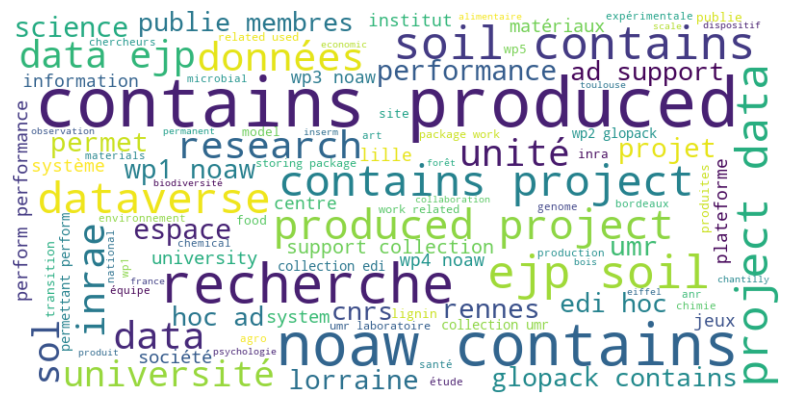

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define stopwords: English, French, and custom stopwords
english_stopwords = set(stopwords.words('english'))
french_stopwords = set(stopwords.words('french'))
custom_stopwords = {"leur", "000", "h2020", "datasets"}
all_stopwords = list(english_stopwords.union(french_stopwords).union(custom_stopwords))

# Only keep rows with non-NaN descriptions
df_dataverse = df_dataverse.dropna(subset=['description'])

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=all_stopwords, use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_dataverse['description'])
terms = tfidf_vectorizer.get_feature_names_out()

# Convert the matrix to a DataFrame for easier viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# Collect top 5 keywords for each dataverse
top_keywords = []

top_n = 5  # Number of top words per dataverse
for index, row in tfidf_df.iterrows():
    # Get the URL of the current dataverse
    url = df_dataverse.iloc[index]['url']  # Assuming the 'url' column exists
    
    # Sort and select top 5 keywords
    sorted_items = row.sort_values(ascending=False).head(top_n)
    
    # Print the URL and top keywords
    print(f"\nDataverse {index+1} URL: {url}")
    print(f"Top {top_n} keywords: {sorted_items.index.tolist()}")
    print("=====================================")

    # Append the top keywords to the list for WordCloud generation
    top_keywords.extend(sorted_items.index.tolist())

# Join all keywords into a single string for WordCloud
keywords_text = ' '.join(top_keywords)

# Generate the WordCloud using the top keywords
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(keywords_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

# Date analysis

In [38]:
df['published_at'] = pd.to_datetime(df['published_at'])

In [39]:
df['published_at']

0       2018-01-18 10:38:25+00:00
1       2018-01-18 10:26:52+00:00
2       2018-01-18 10:38:32+00:00
3       2018-01-18 10:38:36+00:00
4       2018-01-18 10:26:11+00:00
                   ...           
66374   2024-09-28 00:00:08+00:00
66375   2024-09-27 00:00:00+00:00
66376   2024-09-24 00:00:08+00:00
66377   2024-10-01 00:16:32+00:00
66378   2024-10-01 00:13:52+00:00
Name: published_at, Length: 66379, dtype: datetime64[ns, UTC]

In [40]:
df['year_month'] = df['published_at'].dt.to_period('M')

df['year'] = df['published_at'].dt.year

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\4035253343.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [41]:
df.groupby(df['year'])['description'].count()

year
2018      421
2019      645
2020     1762
2021     3600
2022     7890
2023    11664
2024    12344
Name: description, dtype: int64

In [42]:
df.groupby(df['year'])['name'].count()

year
2018      925
2019     4339
2020     4068
2021     8417
2022    12001
2023    16297
2024    20332
Name: name, dtype: int64

In [43]:
filtered_df = df[df['type'] == 'dataset']

# Perform groupby and count the unique names
result = filtered_df.groupby('year')['name'].count()
result

year
2018      64
2019     141
2020     307
2021     690
2022     653
2023     960
2024    1635
Name: name, dtype: int64

In [44]:
df_description_1['published_at'] = pd.to_datetime(df_description_1['published_at'])

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\2372842973.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df_description_1['year'] = df_description_1['published_at'].dt.year

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\4056641404.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
filtered_df_descr = df_description_1[df_description_1['type'] == 'dataset']

# Perform groupby and count the unique names
result2 = filtered_df_descr.groupby('year')['name'].count()
result2

year
2018      64
2019     141
2020     307
2021     690
2022     653
2023     960
2024    1635
Name: name, dtype: int64

In [47]:
descr_year_type = df_description_1.groupby(['year', 'type'])['description'].nunique()

In [48]:
general_year_type = df.groupby(['year', 'type'])['name'].nunique()

In [49]:
df_year_type = pd.DataFrame(general_year_type)

In [50]:
df_desc_y_t = pd.DataFrame(descr_year_type)

In [51]:
df_year_type['with_description'] = df_desc_y_t['description']

In [52]:
df_year_type['description_score'] =  (df_year_type['with_description'] / df_year_type['name'])*100

In [53]:
df_year_type

name  with_description  description_score
year type                                                 
2018 dataset       64                59          92.187500
     dataverse     67                70         104.477612
     file         782                89          11.381074
2019 dataset      141               141         100.000000
     dataverse     26                21          80.769231
     file        4136               359           8.679884
2020 dataset      307               278          90.553746
     dataverse     68                47          69.117647
     file        3562               665          18.669287
2021 dataset      688               686          99.709302
     dataverse     67                39          58.208955
     file        5364              1344          25.055928
2022 dataset      652               650          99.693252
     dataverse    201               113          56.218905
     file       10910              1394          12.777269
2023 dataset      959               950          99.061522
     dataverse    278               218          78.417266
     file       14688              2229          15.175654
2024 dataset     1630              1588          97.423313
     dataverse    225               192          85.333333
     file       17033              2248          13.197910

In [54]:
df_keywords['published_at'] = pd.to_datetime(df_keywords['published_at'])

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\3671930499.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df_keywords['year'] = df_keywords['published_at'].dt.year

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\2508860196.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_keywords = pd.DataFrame(df_keywords)

In [57]:
keywords_year_type = df_keywords.groupby(['year', 'type'])['keywords'].count()

In [58]:
df_kw_y_t = pd.DataFrame(keywords_year_type)

In [59]:
df_year_type['with_keywords'] = df_kw_y_t['keywords']

In [60]:
df_year_type['keywords_score'] = (df_year_type['with_keywords'] / df_year_type['name'] ) * 100

In [61]:
df_year_type

name  with_description  description_score  with_keywords  \
year type                                                                   
2018 dataset       64                59          92.187500           64.0   
     dataverse     67                70         104.477612            NaN   
     file         782                89          11.381074            NaN   
2019 dataset      141               141         100.000000          141.0   
     dataverse     26                21          80.769231            NaN   
     file        4136               359           8.679884            NaN   
2020 dataset      307               278          90.553746          307.0   
     dataverse     68                47          69.117647            NaN   
     file        3562               665          18.669287            NaN   
2021 dataset      688               686          99.709302          690.0   
     dataverse     67                39          58.208955            NaN   
     file        5364              1344          25.055928            NaN   
2022 dataset      652               650          99.693252          653.0   
     dataverse    201               113          56.218905            NaN   
     file       10910              1394          12.777269            NaN   
2023 dataset      959               950          99.061522          960.0   
     dataverse    278               218          78.417266            NaN   
     file       14688              2229          15.175654            NaN   
2024 dataset     1630              1588          97.423313         1635.0   
     dataverse    225               192          85.333333            NaN   
     file       17033              2248          13.197910            NaN   

                keywords_score  
year type                       
2018 dataset        100.000000  
     dataverse             NaN  
     file                  NaN  
2019 dataset        100.000000  
     dataverse             NaN  
     file                  NaN  
2020 dataset        100.000000  
     dataverse             NaN  
     file                  NaN  
2021 dataset        100.290698  
     dataverse             NaN  
     file                  NaN  
2022 dataset        100.153374  
     dataverse             NaN  
     file                  NaN  
2023 dataset        100.104275  
     dataverse             NaN  
     file                  NaN  
2024 dataset        100.306748  
     dataverse             NaN  
     file                  NaN

In [62]:
df_year_type['score'] = (df_year_type['description_score'] + df_year_type['keywords_score'])/2

In [63]:
df_year_type

name  with_description  description_score  with_keywords  \
year type                                                                   
2018 dataset       64                59          92.187500           64.0   
     dataverse     67                70         104.477612            NaN   
     file         782                89          11.381074            NaN   
2019 dataset      141               141         100.000000          141.0   
     dataverse     26                21          80.769231            NaN   
     file        4136               359           8.679884            NaN   
2020 dataset      307               278          90.553746          307.0   
     dataverse     68                47          69.117647            NaN   
     file        3562               665          18.669287            NaN   
2021 dataset      688               686          99.709302          690.0   
     dataverse     67                39          58.208955            NaN   
     file        5364              1344          25.055928            NaN   
2022 dataset      652               650          99.693252          653.0   
     dataverse    201               113          56.218905            NaN   
     file       10910              1394          12.777269            NaN   
2023 dataset      959               950          99.061522          960.0   
     dataverse    278               218          78.417266            NaN   
     file       14688              2229          15.175654            NaN   
2024 dataset     1630              1588          97.423313         1635.0   
     dataverse    225               192          85.333333            NaN   
     file       17033              2248          13.197910            NaN   

                keywords_score       score  
year type                                   
2018 dataset        100.000000   96.093750  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2019 dataset        100.000000  100.000000  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2020 dataset        100.000000   95.276873  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2021 dataset        100.290698  100.000000  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2022 dataset        100.153374   99.923313  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2023 dataset        100.104275   99.582899  
     dataverse             NaN         NaN  
     file                  NaN         NaN  
2024 dataset        100.306748   98.865031  
     dataverse             NaN         NaN  
     file                  NaN         NaN

# Separation descriptions francais et anglais

In [64]:
!pip install langid


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import langid


# Function to detect language
def detect_language(text):
    return langid.classify(text)[0]

# Apply language detection and split descriptions
df_description_1['language'] = df_description_1['description'].apply(detect_language)
df_description_1['description_fr'] = df_description_1[df_description_1['language'] == 'fr']['description']
df_description_1['description_en'] = df_description_1[df_description_1['language'] == 'en']['description']

# Drop the 'language' column if needed
#df.drop('language', axis=1, inplace=True)

# Display the DataFrame
print(df_description_1)

                                                    name       type  \
0                                        Omics Dataverse  dataverse   
1                                   Vocabulaires Ouverts  dataverse   
2                   URGI - Plant Bioinformatics Facility  dataverse   
3                                        GnpIS Dataverse  dataverse   
5                                      PREMIUM Dataverse  dataverse   
...                                                  ...        ...   
66374  Data on the Genetic Diversity Study of the Afr...    dataset   
66375              Group conflicts experimental evidence    dataset   
66376  Genetic data (9 microsatellite markers) of nat...    dataset   
66377  Capital social, réseaux sociaux et ressources ...    dataset   
66378  Transcriptions Journées Annuelles MATE-SHS 202...    dataset   

                                                     url identifier  \
0      https://entrepot.recherche.data.gouv.fr/datave...      omics   
1    

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\3848091412.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\3848091412.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Anthony\AppData\Local\Temp\ipykernel_17852\3848091412.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [66]:
df_description_1['language'].value_counts()

language
en    11646
fr     2803
mt      161
la      141
es      105
nl       92
de       88
it       75
da       70
pl       20
pt       19
no       18
ca       15
ms        9
eo        9
nn        7
fi        6
bs        6
et        5
lv        4
lt        4
sv        4
ro        4
sl        4
hu        4
tr        3
eu        3
id        3
gl        2
mg        2
cy        2
is        2
br        1
lb        1
am        1
af        1
rw        1
he        1
ku        1
tl        1
ar        1
Name: count, dtype: int64

In [67]:
df_descr_fr = df_description_1[df_description_1['language'] == 'fr']

In [68]:
df_descr_en = df_description_1[df_description_1['language'] == 'en']

# BERTopic - WIP

## Installation de BERTopic

In [59]:
%%capture
%pip install bertopic

## Descriptions en Français

### Entrainement

In [60]:
from bertopic import BERTopic

topic_model = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df_descr_fr['description'])

2024-09-30 09:13:36,996 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/79 [00:00<?, ?it/s]

2024-09-30 09:13:47,366 - BERTopic - Embedding - Completed ✓
2024-09-30 09:13:47,367 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-09-30 09:13:55,741 - BERTopic - Dimensionality - Completed ✓
2024-09-30 09:13:55,742 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-09-30 09:13:56,062 - BERTopic - Cluster - Completed ✓
2024-09-30 09:13:56,065 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-09-30 09:13:56,191 - BERTopic - Representation - Completed ✓


In [61]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,655,-1_de_la_et_des,"[de, la, et, des, les, le, en, the, du, données]","[En 1985, Michael Pollak initie un programme d..."
1,0,97,0_the_and_et_social,"[the, and, et, social, enquête, elipss, of, qu...",[L’enquête annuelle ELIPSS a pour objectif de ...
2,1,90,1_recherche_université_et_rennes,"[recherche, université, et, rennes, de, labora...",[L'Université de Rennes regroupe des composant...
3,2,87,2_cross_section_data_,"[cross, section, data, , , , , , , ]","[Cross section data, Cross section data, Cross..."
4,3,63,3_répondants_participatives_recherches_statist...,"[répondants, participatives, recherches, stati...",[Statistiques sur les pratiques d'ouverture de...
...,...,...,...,...,...
71,70,11,70_température_air_versant_ventoux,"[température, air, versant, ventoux, horaires,...",[données horaires de température de l'air en °...
72,71,11,71_coordinates_mesures_gps_lambert,"[coordinates, mesures, gps, lambert, coordonné...",[Mesures des résistivités électriques spatiali...
73,72,11,72_guinée_glm_pêche_captures,"[guinée, glm, pêche, captures, modèles, spp, d...",[Le présent document décrit l’utilisation des ...
74,73,10,73_rpg_2019_cesbio_parcellaires,"[rpg, 2019, cesbio, parcellaires, odr, complèt...",[RPG complété 2019. Complète le RPG campagne 2...


In [62]:
topic_model.get_topic(0)

[('the', 0.013675734530287023),
 ('and', 0.012307967550457953),
 ('et', 0.01197722137557341),
 ('social', 0.011750511131672496),
 ('enquête', 0.011459054895155633),
 ('elipss', 0.011250961810007317),
 ('of', 0.010857122769021774),
 ('questions', 0.010657334722566665),
 ('in', 0.010655803479462583),
 ('de', 0.010069350517888835)]

In [63]:
topic_model.topics_[:10]

[-1, -1, -1, -1, 31, 35, 4, 58, 58, 35]

### Visualisations

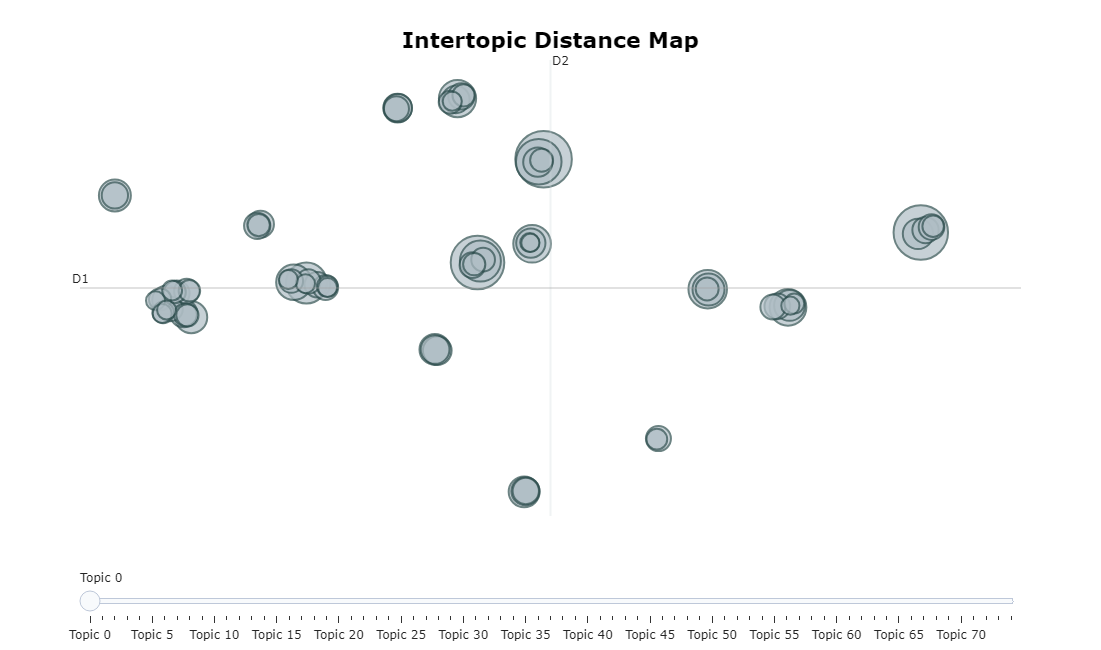

In [64]:
topic_model.visualize_topics()

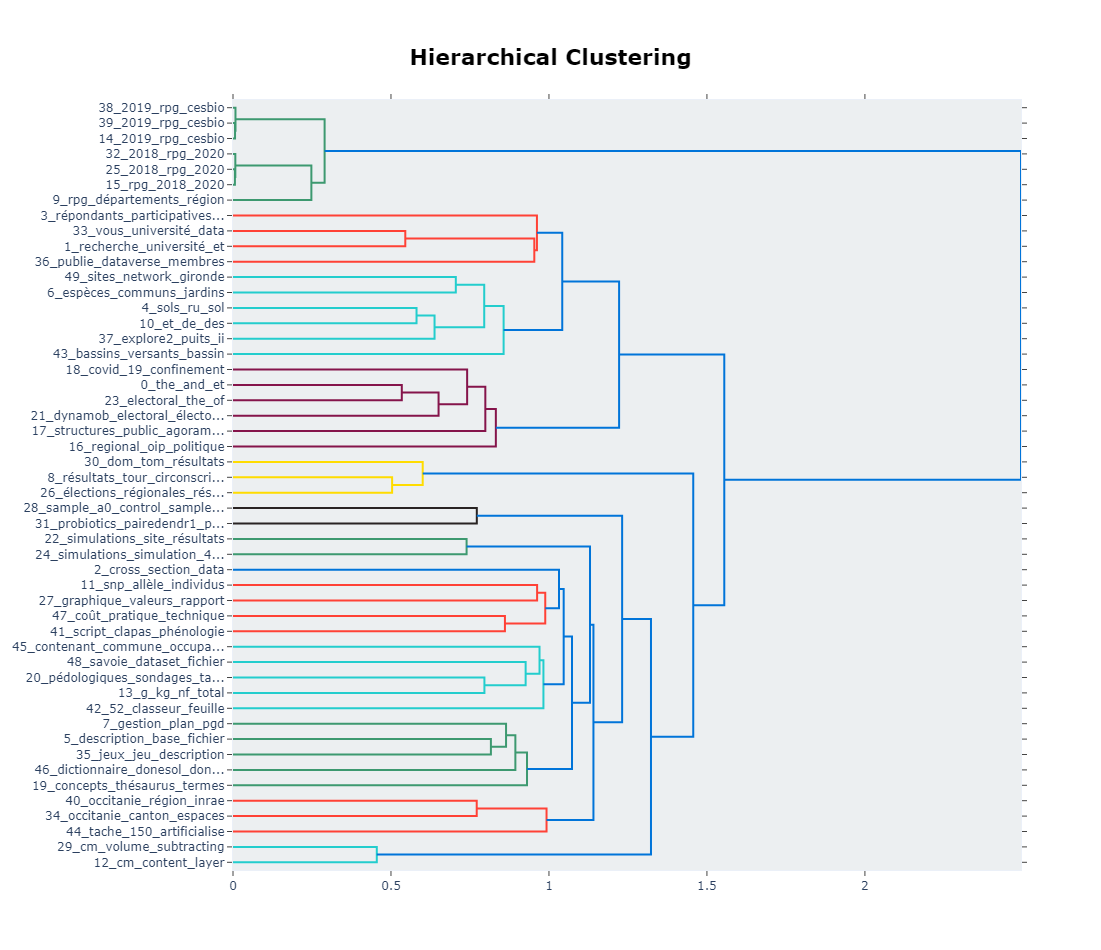

In [65]:
topic_model.visualize_hierarchy(top_n_topics=50)

### Fine-Tuning des paramètres

In [66]:
#je n'arrive pas a faire une reduction des outliers

In [67]:
# Update the internal topic representation of the topics
topic_model.update_topics(df_descr_fr['description'], topics)
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,655,-1_de_la_et_des,"[de, la, et, des, les, le, en, the, du, données]","[En 1985, Michael Pollak initie un programme d..."
1,0,97,0_the_and_et_social,"[the, and, et, social, enquête, elipss, of, qu...",[L’enquête annuelle ELIPSS a pour objectif de ...
2,1,90,1_recherche_université_et_rennes,"[recherche, université, et, rennes, de, labora...",[L'Université de Rennes regroupe des composant...
3,2,87,2_cross_section_data_,"[cross, section, data, , , , , , , ]","[Cross section data, Cross section data, Cross..."
4,3,63,3_répondants_participatives_recherches_statist...,"[répondants, participatives, recherches, stati...",[Statistiques sur les pratiques d'ouverture de...
...,...,...,...,...,...
71,70,11,70_température_air_versant_ventoux,"[température, air, versant, ventoux, horaires,...",[données horaires de température de l'air en °...
72,71,11,71_coordinates_mesures_gps_lambert,"[coordinates, mesures, gps, lambert, coordonné...",[Mesures des résistivités électriques spatiali...
73,72,11,72_guinée_glm_pêche_captures,"[guinée, glm, pêche, captures, modèles, spp, d...",[Le présent document décrit l’utilisation des ...
74,73,10,73_rpg_2019_cesbio_parcellaires,"[rpg, 2019, cesbio, parcellaires, odr, complèt...",[RPG complété 2019. Complète le RPG campagne 2...


In [68]:
topic_model.reduce_topics(df_descr_fr['description'], nr_topics=40)

2024-09-30 09:14:11,063 - BERTopic - Topic reduction - Reducing number of topics
2024-09-30 09:14:11,175 - BERTopic - Topic reduction - Reduced number of topics from 76 to 40


In [69]:
freq = topic_model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,655,-1_de_la_et_des,"[de, la, et, des, les, le, the, en, of, du]","[En 1985, Michael Pollak initie un programme d..."
1,0,460,0_et_de_des_la,"[et, de, des, la, les, the, en, du, dans, le]",[L'enquête Pratiques et représentations face à...
2,1,249,1_rpg_cesbio_parcellaires_odr,"[rpg, cesbio, parcellaires, odr, complète, tra...",[RPG complété 2018. Complète le RPG campagne 2...
3,2,117,2_résultats_tour_élections_par,"[résultats, tour, élections, par, 1er, circons...",[Les résultats du 1er tour des élections légis...
4,3,90,3_recherche_université_et_de,"[recherche, université, et, de, des, rennes, l...",[Université ouverte source de réussite Au cœur...
5,4,87,4_cross_section_data_,"[cross, section, data, , , , , , , ]","[Cross section data, Cross section data, Cross..."
6,5,52,5_cm_layer_coarse_elements,"[cm, layer, coarse, elements, couche, grossier...",[RU élémentaire en cm3 cm-3 sans le volume des...
7,6,51,6_description_base_fichier_dataset,"[description, base, fichier, dataset, fichiers...",[EN : Dataset documenting open source software...
8,7,50,7_electoral_the_of_elections,"[electoral, the, of, elections, électorales, p...",[La majeure partie des connaissances produites...
9,8,49,8_simulations_site_résultats_simulation,"[simulations, site, résultats, simulation, des...","[Résultats des simulations du site 6, Résultat..."


In [70]:
freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,655,-1_de_la_et_des,"[de, la, et, des, les, le, the, en, of, du]","[En 1985, Michael Pollak initie un programme d..."
1,0,460,0_et_de_des_la,"[et, de, des, la, les, the, en, du, dans, le]",[L'enquête Pratiques et représentations face à...
2,1,249,1_rpg_cesbio_parcellaires_odr,"[rpg, cesbio, parcellaires, odr, complète, tra...",[RPG complété 2018. Complète le RPG campagne 2...
3,2,117,2_résultats_tour_élections_par,"[résultats, tour, élections, par, 1er, circons...",[Les résultats du 1er tour des élections légis...
4,3,90,3_recherche_université_et_de,"[recherche, université, et, de, des, rennes, l...",[Université ouverte source de réussite Au cœur...


In [71]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anthony/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words()
vectorizer_model = CountVectorizer(stop_words=stop_words)

topic_model.update_topics(df_descr_fr['description'], vectorizer_model=vectorizer_model)

In [73]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,655,-1_données_recherche_police_research,"[données, recherche, police, research, data, c...","[En 1985, Michael Pollak initie un programme d..."
1,0,460,0_données_enquête_questions_social,"[données, enquête, questions, social, elipss, ...",[L'enquête Pratiques et représentations face à...
2,1,249,1_rpg_cesbio_parcellaires_odr,"[rpg, cesbio, parcellaires, odr, complète, tra...",[RPG complété 2018. Complète le RPG campagne 2...
3,2,117,2_résultats_tour_élections_1er,"[résultats, tour, élections, 1er, circonscript...",[Les résultats du 1er tour des élections légis...
4,3,90,3_recherche_université_rennes_laboratoire,"[recherche, université, rennes, laboratoire, s...",[Université ouverte source de réussite Au cœur...
5,4,87,4_cross_section_data_,"[cross, section, data, , , , , , , ]","[Cross section data, Cross section data, Cross..."
6,5,52,5_cm_layer_coarse_elements,"[cm, layer, coarse, elements, couche, grossier...",[RU élémentaire en cm3 cm-3 sans le volume des...
7,6,51,6_description_base_fichier_dataset,"[description, base, fichier, dataset, fichiers...",[EN : Dataset documenting open source software...
8,7,50,7_electoral_électorales_elections_political,"[electoral, électorales, elections, political,...",[La majeure partie des connaissances produites...
9,8,49,8_simulations_site_résultats_simulation,"[simulations, site, résultats, simulation, 4p1...","[Résultats des simulations du site 6, Résultat..."


## Descriptions en anglais

In [74]:
topics_en, probs_en = topic_model.fit_transform(df_descr_en['description'])

2024-09-30 09:14:14,562 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/324 [00:00<?, ?it/s]

2024-09-30 09:14:19,977 - BERTopic - Embedding - Completed ✓
2024-09-30 09:14:19,978 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-09-30 09:14:32,925 - BERTopic - Dimensionality - Completed ✓
2024-09-30 09:14:32,925 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-09-30 09:14:55,415 - BERTopic - Cluster - Completed ✓
2024-09-30 09:14:55,416 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-09-30 09:14:55,690 - BERTopic - Representation - Completed ✓
2024-09-30 09:14:55,690 - BERTopic - Topic reduction - Reducing number of topics
2024-09-30 09:14:55,944 - BERTopic - Topic reduction - Reduced number of topics from 277 to 40


In [75]:
freq_en = topic_model.get_topic_info(); freq_en

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2943,-1_data_dataset_file_contains,"[data, dataset, file, contains, files, analysi...",[RMQS: The French Soil Quality Monitoring Netw...
1,0,1161,0_fastq_r2_r1_genotype,"[fastq, r2, r1, genotype, archive, containing,...",[Archive containing R1 and R2 fastq files for ...
2,1,1147,1_soil_data_raster_tree,"[soil, data, raster, tree, dataset, number, co...",[Reclassified consensus (median of climate sui...
3,2,1019,2_script_tsv_data_dataverse,"[script, tsv, data, dataverse, generates, valu...",[We downloaded simulated data from Jia and Jan...
4,3,434,3_column_organosolv_lignins_nm,"[column, organosolv, lignins, nm, molecule, la...",[This table presents the results of the cytoto...
5,4,359,4_cows_dataset_fish_data,"[cows, dataset, fish, data, diet, dairy, conta...",[This dataset contains data for the 14 challen...
6,5,304,5_replicate_milk_biological_staphylococcus,"[replicate, milk, biological, staphylococcus, ...",[Proteome of lactobacillus delbrueckii subsp b...
7,6,285,6_pictures_cell_beads_trypsine,"[pictures, cell, beads, trypsine, cells, addit...",[Cell 4 cells pictures after trypsine addition...
8,7,254,7_palynological_samples_archaeological_site,"[palynological, samples, archaeological, site,...",[Archaeological site. Lake dwelling. 5 palynol...
9,8,249,8_bourget_annecy_readme_lidar,"[bourget, annecy, readme, lidar, gapdh, inf, a...","[Bourget, Bourget, Bourget]"


In [76]:
# Reduce outliers
#topics = topic_model.reduce_outliers(df_descr_en['description'], topics)

In [77]:
topic_model.update_topics(df_descr_en['description'], vectorizer_model=vectorizer_model)

In [78]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2943,-1_data_dataset_file_contains,"[data, dataset, file, contains, files, analysi...",[RMQS: The French Soil Quality Monitoring Netw...
1,0,1161,0_fastq_r2_r1_genotype,"[fastq, r2, r1, genotype, archive, containing,...",[Archive containing R1 and R2 fastq files for ...
2,1,1147,1_soil_data_raster_tree,"[soil, data, raster, tree, dataset, number, co...",[Reclassified consensus (median of climate sui...
3,2,1019,2_script_tsv_data_dataverse,"[script, tsv, data, dataverse, generates, valu...",[We downloaded simulated data from Jia and Jan...
4,3,434,3_column_organosolv_lignins_nm,"[column, organosolv, lignins, nm, molecule, la...",[This table presents the results of the cytoto...
5,4,359,4_cows_dataset_fish_data,"[cows, dataset, fish, data, diet, dairy, conta...",[This dataset contains data for the 14 challen...
6,5,304,5_replicate_milk_biological_staphylococcus,"[replicate, milk, biological, staphylococcus, ...",[Proteome of lactobacillus delbrueckii subsp b...
7,6,285,6_pictures_cell_beads_trypsine,"[pictures, cell, beads, trypsine, cells, addit...",[Cell 4 cells pictures after trypsine addition...
8,7,254,7_palynological_samples_archaeological_site,"[palynological, samples, archaeological, site,...",[Archaeological site. Lake dwelling. 5 palynol...
9,8,249,8_bourget_annecy_readme_lidar,"[bourget, annecy, readme, lidar, gapdh, inf, a...","[Bourget, Bourget, Bourget]"
